In [2]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [3]:
# Download necessary NLTK data
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
df = pd.read_csv("C:/Users/Asus/Desktop/Sentimental Analysis/IMDB Dataset.csv")

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [7]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
df.shape

(50000, 2)

In [9]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [10]:
# Preprocessing functions
stop_words = set(nltk.corpus.stopwords.words('english'))
lemmatizer = nltk.stem.WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)  # remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)  # remove non-alphabetic characters
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return ' '.join(tokens)

# Clean the reviews
df['clean_review'] = df['review'].apply(preprocess_text)
df[['review', 'clean_review', 'sentiment']].head()

,review,clean_review,sentiment
0,One of the other reviewers has mentioned that ...,one reviewer mentioned watching oz episode you...,positive
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...,positive
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...,positive
3,Basically there's a family where a little boy ...,basically there family little boy jake think t...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...,positive


C:\Users\Asus\AppData\Local\Temp\ipykernel_13436\3766439434.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='pastel')


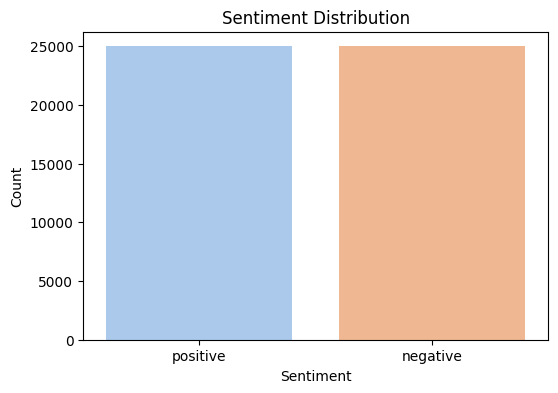

In [11]:
# Plot 1: Sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment', palette='pastel')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [12]:
# Separate positive and negative reviews
positive_reviews = df[df['sentiment'] == 'positive']['clean_review']
negative_reviews = df[df['sentiment'] == 'negative']['clean_review']

# Combine all reviews into one big string
positive_text = " ".join(positive_reviews)
negative_text = " ".join(negative_reviews)

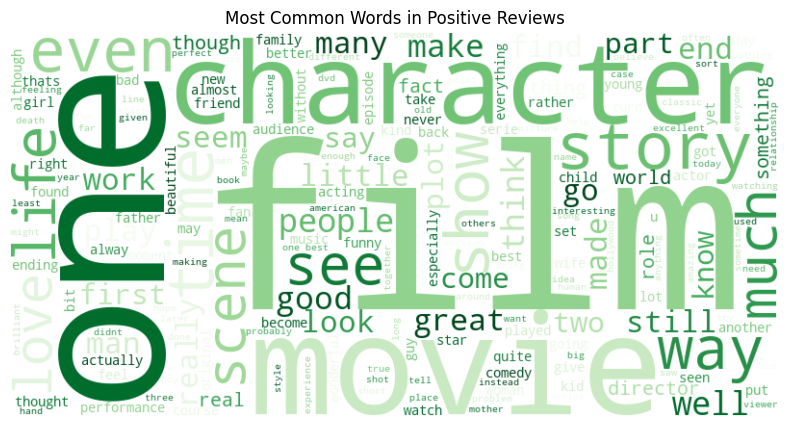

In [13]:
# Plot 2: WordCloud for positive reviews
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Positive Reviews")
plt.show()

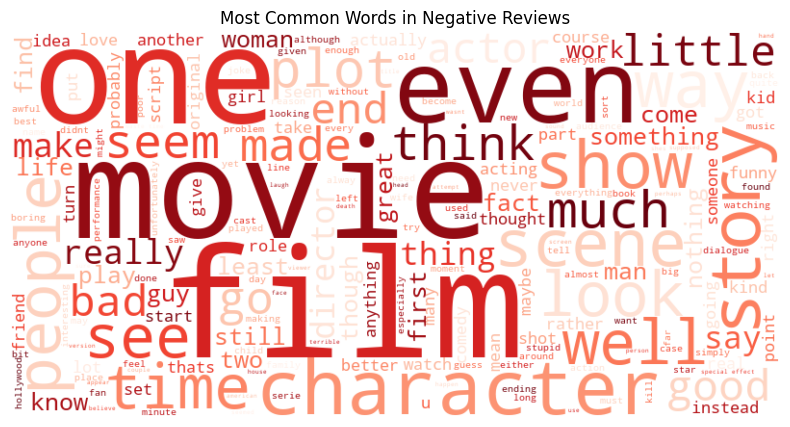

In [14]:
# Plot 3: WordCloud for negative reviews
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Negative Reviews")
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(df['clean_review'], df['sentiment'], test_size=0.2, random_state=42)

In [17]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [18]:
# Model 1: Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
lr_preds = lr_model.predict(X_test_tfidf)

In [19]:
# Model 2: Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_preds = nb_model.predict(X_test_tfidf)

In [20]:
# Calculate accuracies
lr_accuracy = accuracy_score(y_test, lr_preds)
nb_accuracy = accuracy_score(y_test, nb_preds)

# Create a simple comparison DataFrame
comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Multinomial Naive Bayes"],
    "Accuracy": [lr_accuracy, nb_accuracy]
})

# Print comparison
print(comparison_df)

# Print classification reports
print("\nLogistic Regression Classification Report:\n")
print(classification_report(y_test, lr_preds))

print("\nMultinomial Naive Bayes Classification Report:\n")
print(classification_report(y_test, nb_preds))

                     Model  Accuracy
0      Logistic Regression    0.8849
1  Multinomial Naive Bayes    0.8491

Logistic Regression Classification Report:

              precision    recall  f1-score   support

    negative       0.89      0.87      0.88      4961
    positive       0.88      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000


Multinomial Naive Bayes Classification Report:

              precision    recall  f1-score   support

    negative       0.85      0.84      0.85      4961
    positive       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [22]:
# Take user input
user_review = input("Enter a movie review: ")

# Preprocess and vectorize the input
clean_text = preprocess_text(user_review)
vectorized_text = vectorizer.transform([clean_text])

# Predict using Logistic Regression model
prediction = lr_model.predict(vectorized_text)

# Show the comment and predicted sentiment
print(f"\nYour Comment: {user_review}")
print(f"Predicted Sentiment: {prediction[0]}")



Your Comment: The movie was not much better
Predicted Sentiment: negative
